In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image 

/Users/menglu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


numpy has functions for calculating the mean, variance, standard deviation. 

In [2]:
values = np.array([-14.82381293, -0.29423447, -13.56067979, -1.6288903, -0.31632439,
                   0.53459687, -1.34069996, -1.61042692, -4.03220519, -0.24332097])
print('mean:              ', np.mean(values))
print('variance:          ', np.var(values))
print('standard deviation:', np.std(values))

# Tiny exercise: round the variance and standard deviation to 2 digits.
# example: print("mean:", np.round(np.mean(values),2))

mean:               -3.7315998049999997
variance:           28.822364260579157
standard deviation: 5.36864640860051


Let us now look at a real-life dataset for NO2 mapping. For more information about the dataset, please refer to this [NO2 mapping paper](https://www.sciencedirect.com/science/article/pii/S0160412020318110). You are all familiar with excel tables or CSV (A CSV is a comma-separated values file, which allows data to be saved in a tabular format). we will use the python package "pandas" to read and process the csv file. 

In [3]:
#download data
spreadurl = 'https://raw.githubusercontent.com/mengluchu/uncertainty/master/data_vis_exp/DENL17_uc.csv'
# load the data
ap = pd.read_csv(spreadurl)


Select variables that we are insterested in. "wkd_day_value" is the annual averaged NO2 during weekdays at daytime (7:00 am - 9:59 pm) 


In [4]:
#select variables
apf = ap.filter (regex="pop|nightlight|trop|ele|wind|temp|road|wkd_day_value") 
# look at the dataframe
print(apf.columns) #get the variables names
n = 5
apf.head(n) #get the first n rows

#Tiny exercise: get the first 3 rows. 

Index(['wkd_day_value', 'nightlight_450', 'nightlight_4950', 'nightlight_3150',
       'nightlight_900', 'elevation', 'population_1000', 'population_3000',
       'population_5000', 'road_class_1_1000', 'road_class_1_100',
       'road_class_1_25', 'road_class_1_3000', 'road_class_1_300',
       'road_class_1_5000', 'road_class_1_500', 'road_class_1_50',
       'road_class_2_1000', 'road_class_2_100', 'road_class_2_25',
       'road_class_2_3000', 'road_class_2_300', 'road_class_2_5000',
       'road_class_2_500', 'road_class_2_50', 'road_class_3_1000',
       'road_class_3_100', 'road_class_3_25', 'road_class_3_3000',
       'road_class_3_300', 'road_class_3_5000', 'road_class_3_500',
       'road_class_3_50', 'temperature_2m_10', 'temperature_2m_11',
       'temperature_2m_12', 'temperature_2m_1', 'temperature_2m_2',
       'temperature_2m_3', 'temperature_2m_4', 'temperature_2m_5',
       'temperature_2m_6', 'temperature_2m_7', 'temperature_2m_8',
       'temperature_2m_9', 'trop_me

,wkd_day_value,nightlight_450,nightlight_4950,nightlight_3150,nightlight_900,elevation,population_1000,population_3000,population_5000,road_class_1_1000,...,wind_speed_10m_12,wind_speed_10m_1,wind_speed_10m_2,wind_speed_10m_3,wind_speed_10m_4,wind_speed_10m_5,wind_speed_10m_6,wind_speed_10m_7,wind_speed_10m_8,wind_speed_10m_9
0,15.486447,1.089349,2.481067,0.573704,0.910668,1.253298,440.064819,3312.588867,8206.843750,0.0,...,4.437889,3.326515,4.202672,4.156390,3.288325,3.347359,3.915079,3.473112,2.966664,3.397882
1,14.697327,3.230887,0.776905,1.807236,3.279380,-0.690162,492.458710,3886.029297,5170.122070,0.0,...,6.136888,4.650394,5.707218,5.266993,4.387266,4.219216,4.981627,4.430753,4.049176,4.611426
2,28.577064,15.185451,51.658539,49.109848,15.834966,1.973670,3102.089111,23252.750000,61342.878906,0.0,...,6.207231,4.730088,5.772330,5.198254,4.464532,4.205428,4.968825,4.396253,4.097217,4.636786
3,31.335268,31.591223,108.899269,105.218941,41.687683,7.877421,6142.983398,36911.640625,79492.710938,0.0,...,5.624970,4.246189,5.293065,4.822597,4.105578,3.904168,4.626059,4.042036,3.742742,4.212022
4,23.677740,31.661768,24.221060,32.607677,34.173950,6.165680,19552.472656,152638.750000,322745.000000,0.0,...,5.645605,4.320222,5.371153,4.815842,4.214552,3.924830,4.629953,4.040438,3.776271,4.228816


We can obtain the basic statistical description using the "descibe" method.

In [5]:
apf.describe()

,wkd_day_value,nightlight_450,nightlight_4950,nightlight_3150,nightlight_900,elevation,population_1000,population_3000,population_5000,road_class_1_1000,...,wind_speed_10m_12,wind_speed_10m_1,wind_speed_10m_2,wind_speed_10m_3,wind_speed_10m_4,wind_speed_10m_5,wind_speed_10m_6,wind_speed_10m_7,wind_speed_10m_8,wind_speed_10m_9
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,...,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,26.954116,15.245239,9.044186,11.033635,14.686876,171.709049,6149.919575,41495.331104,94124.200708,1212.001476,...,3.695641,2.832647,3.396075,3.225519,2.954213,2.566703,3.003814,2.684772,2.510066,2.703582
std,16.037734,13.472012,10.162684,10.997232,12.831380,210.356609,4504.243782,35000.951753,88325.729436,2705.754172,...,0.821321,0.582540,0.852448,0.611392,0.701939,0.644373,0.727757,0.522073,0.600255,0.660366
min,2.615808,0.000000,0.000560,0.000000,0.000000,-4.332134,0.000000,0.000000,552.417297,0.000000,...,1.248912,1.224902,1.105154,1.207697,1.108624,1.026124,1.021296,1.017121,0.875391,0.900630
25%,14.712573,4.665090,1.953545,2.928990,4.425944,26.100582,2219.177917,11524.904785,23243.484375,0.000000,...,3.157069,2.498561,2.862472,2.875859,2.399894,2.040184,2.458429,2.388771,2.101352,2.252375
50%,23.948446,13.828376,5.969375,8.181555,13.257292,94.629913,5981.528320,33830.275390,69034.738281,0.000000,...,3.634281,2.712368,3.238783,3.017025,2.866309,2.473387,2.902449,2.519323,2.463091,2.609148
75%,35.494337,22.387954,12.523816,16.410417,21.301006,237.837577,8995.891602,61942.635742,141487.503906,191.151607,...,3.934323,2.959297,3.685236,3.494962,3.329137,2.826228,3.264398,2.814551,2.727328,2.968780
max,96.399710,83.368286,108.899269,105.218941,72.906769,1205.937500,20335.248047,165796.593750,431906.093750,22668.818359,...,7.108194,5.553333,7.063876,5.776276,5.886435,5.088363,5.799502,5.103355,4.864278,5.200004


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f915dfdbad0>]],
      dtype=object)

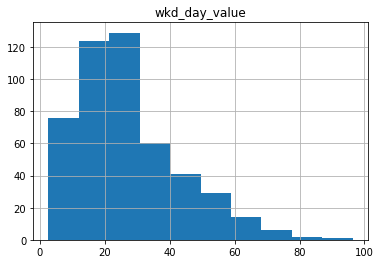

In [6]:
ap.hist("wkd_day_value")

**Scatterplot** is an important data exploration tool to visualize relationships between variables. 

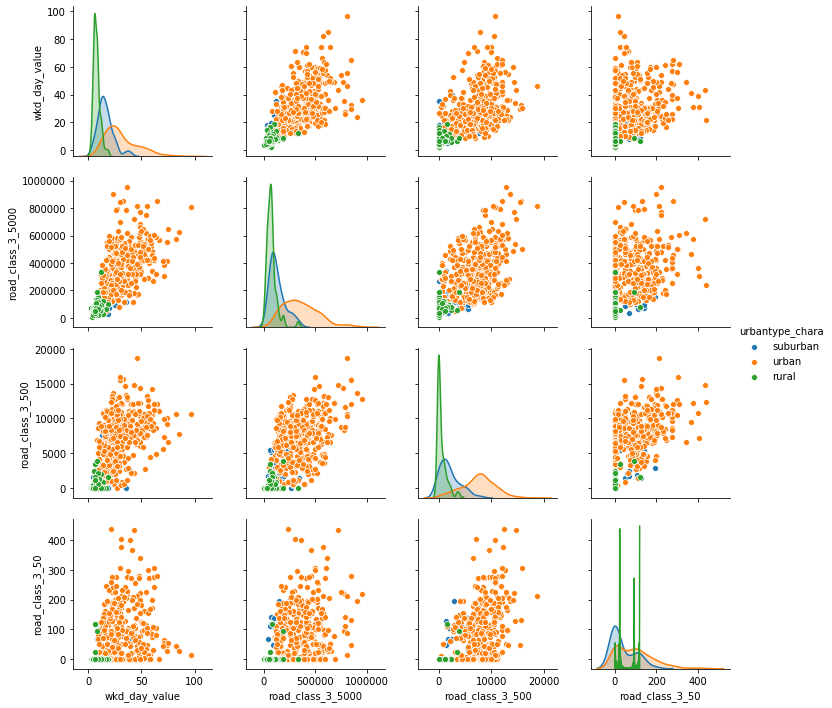

In [7]:

ap_road = ap.filter (regex="road_class_3_50|wkd_day_value|urbantype_ch")
# pd has a method for plotting scatter plots, but not as nice. 
#pd.plotting.scatter_matrix(ap_road, alpha=0.2) 
sns.pairplot(ap_road, hue = "urbantype_chara")

**Countour plot** visualises the density of two variables 

In [8]:
aproad2 = ap.filter (regex="road_class_2_300$|population_3000$") 
aproad2.head()
sns.kdeplot(x= ap.population_3000, y= ap.road_class_2_300)
plt.show()

TypeError: kdeplot() missing 1 required positional argument: 'data'

#### Other basics
We can also have a look at value counts for categorical variables. 

In [ ]:
ap['urbantype_chara'].value_counts()

We can convert dataframe into numpy arrays for array functionalities, simply by adding ".values" to the dataframe. Then we can use all the numpy array functions. 

In [ ]:
ap_road_num = ap_road.filter (regex="road_class_3_50|wkd_day_value")
nproad = ap_road_num.values


For example, we can easily get sum and mean along array dimensions. 

In [ ]:
np.mean(nproad) # mean
np.mean(nproad, axis = 0) # mean over each column. 

In [ ]:
#Tiny exercise: try the following, what do they mean?
np.sum(nproad, axis = 1)
np.mean(nproad, axis = 1)
np.sum(nproad, axis = 0)
